# Air Quality Analysis: A Comparative Study

## Introduction

Air quality is a critical environmental issue that affects public health, ecosystem balance, and the climate. Monitoring and analyzing air pollutants can provide valuable insights into the sources of pollution and the effectiveness of air quality regulations and measures. This notebook focuses on the analysis of air quality data from two distinct locations: Cambridge Roadside and Wicken Fen.

### Objectives

- **Data Handling**: Demonstrate how to load, clean, and prepare air quality data for analysis using Python and its powerful libraries such as Pandas and Matplotlib.
- **Comparative Analysis**: Compare the levels of specific air pollutants, including Nitric oxide (NO), Nitrogen dioxide (NO2), and Nitrogen oxides expressed as nitrogen dioxide (NOx), between an urban roadside in Cambridge and a rural site at Wicken Fen.
- **Temporal Trends**: Explore how pollutant levels vary monthly and identify any significant trends or discrepancies between the two sites over the observed period.

### Data Description

The datasets contain measurements of various pollutants, recorded at two monitoring stations:
- **Cambridge Roadside**: Located in an urban setting, this station captures data relevant to traffic-related pollution.
- **Wicken Fen**: Situated in a rural area, this station helps understand background levels of pollutants, mostly unaffected by direct urban emissions.

## Data Loading
The data is loaded from CSV files into Pandas DataFrames.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
cambridge_roadside_data = pd.read_csv('CambridgeRoadside_0.csv')
wicken_fen_data = pd.read_csv('WickenFen_0.csv')

## Data Preparation and Cleaning
Here we clean the data by converting pollutant concentration values to numeric types, handling missing values, and formatting the date column.


In [5]:
# Define a function to clean and prepare data
def prepare_and_clean_data(df, pollutant_columns, date_column='Date'):

    # Convert all pollutant columns to strings then to numeric, handling non-numeric issues
    for col in pollutant_columns:
        df[col] = df[col].astype(str).str.extract('(\d+\.?\d*)')[0]
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, coerce errors to NaN
    # Convert 'Date' column to datetime format and set as index
    df[date_column] = pd.to_datetime(df[date_column], dayfirst=True)
    df.set_index(date_column, inplace=True)
    return df

In [6]:
# Specify the pollutants to compare
pollutant_columns_cambridge = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide']
pollutant_columns_wicken = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide']


In [7]:
# Drop rows where pollutant data is missing

cambridge_roadside_data = cambridge_roadside_data.dropna(subset=pollutant_columns_cambridge)
wicken_fen_data= wicken_fen_data.dropna(subset=pollutant_columns_wicken)

In [8]:
cambridge_roadside_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Date                                 6199 non-null   object
 1   Nitric oxide                         6199 non-null   object
 2   Status                               6199 non-null   object
 3   Nitrogen dioxide                     6199 non-null   object
 4   Status.1                             6199 non-null   object
 5   Nitrogen oxides as nitrogen dioxide  6199 non-null   object
 6   Status.2                             6199 non-null   object
dtypes: object(7)
memory usage: 339.1+ KB


In [9]:
# Clean the datasets
cambridge_cleaned = prepare_and_clean_data(cambridge_roadside_data, pollutant_columns_cambridge)
wicken_cleaned = prepare_and_clean_data(wicken_fen_data, pollutant_columns_wicken)

In [10]:
cambridge_cleaned.head()

,Nitric oxide,Status,Nitrogen dioxide,Status.1,Nitrogen oxides as nitrogen dioxide,Status.2
Date,,,,,,
1999-07-23,61.0,V ugm-3,36.0,V ugm-3,128.0,V ugm-3
1999-07-24,44.0,V ugm-3,43.0,V ugm-3,109.0,V ugm-3
1999-07-25,6.0,V ugm-3,16.0,V ugm-3,26.0,V ugm-3
1999-07-26,9.0,V ugm-3,16.0,V ugm-3,30.0,V ugm-3
1999-07-27,8.0,V ugm-3,19.0,V ugm-3,31.0,V ugm-3


## Data Analysis
The data is resampled to compute monthly averages of the pollutants for both locations, allowing for trend analysis over time.


In [11]:
# Resample data to monthly averages, ensuring only numeric data is processed
cambridge_monthly = cambridge_cleaned[pollutant_columns_cambridge].resample('M').mean()
wicken_monthly = wicken_cleaned[pollutant_columns_wicken].resample('M').mean()

## Results and Visualization
This section visualizes the monthly average concentrations of pollutants at both locations, providing insights into temporal variations and differences between the two sites.


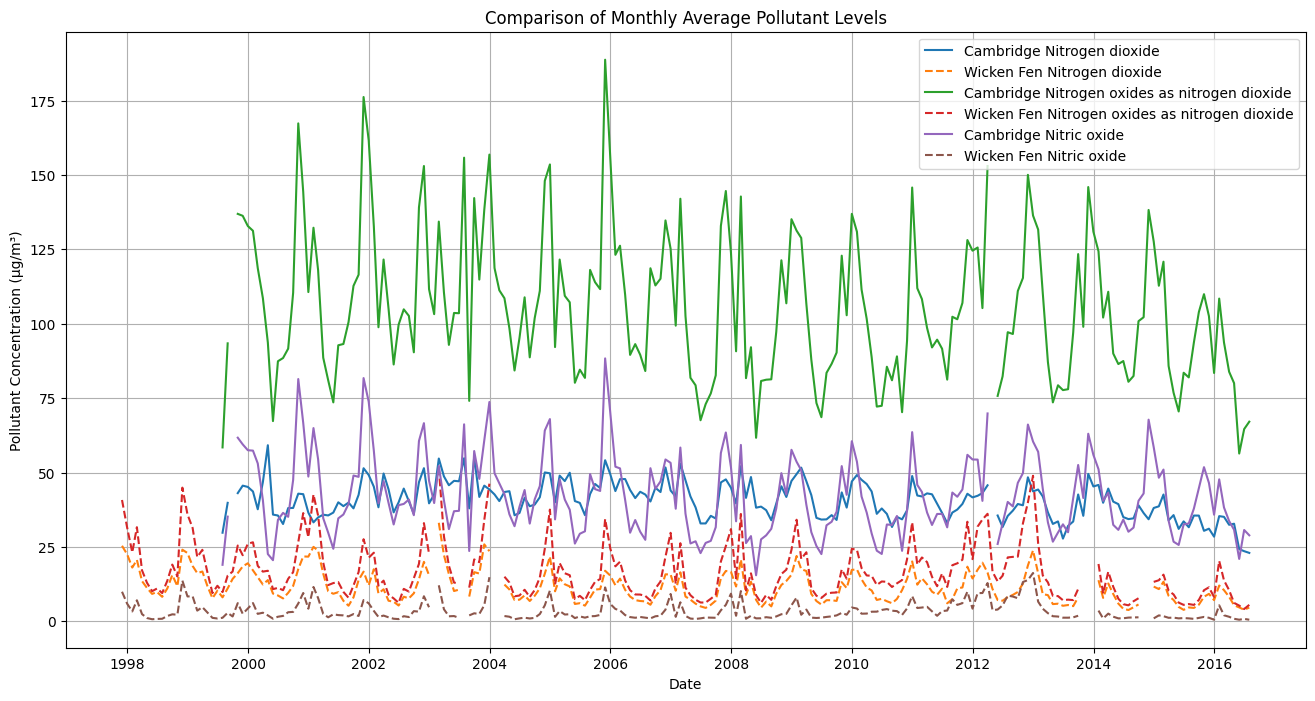

In [12]:
# Plotting
plt.figure(figsize=(16, 8))
common_pollutants = set(cambridge_monthly.columns) & set(wicken_monthly.columns)
for pollutant in common_pollutants:
    if pollutant in ['Nitric oxide', 'Nitrogen dioxide','Nitrogen oxides as nitrogen dioxide']:  # Only plot pollutants found in both datasets
        plt.plot(cambridge_monthly.index, cambridge_monthly[pollutant], label=f'Cambridge {pollutant}')
        plt.plot(wicken_monthly.index, wicken_monthly[pollutant], linestyle='--', label=f'Wicken Fen {pollutant}')


plt.title('Comparison of Monthly Average Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

## Comparative Analysis of Pollutant Trends

The graph presents an in-depth comparison of the monthly average concentrations of Nitric oxide, Nitrogen dioxide, and Nitrogen oxides as nitrogen dioxide from two distinct monitoring locations: Cambridge Roadside and Wicken Fen, spanning from 1998 to 2016.

### Observations:

1. **Pollutant Concentration Levels**:
   - **Cambridge Roadside** shows significantly higher levels of all pollutants compared to Wicken Fen, which is consistent with urban areas having more pollution sources such as vehicles and industrial activities.
   - **Nitrogen oxides as nitrogen dioxide** at Cambridge shows particularly high spikes, which could indicate episodes of particularly high traffic or industrial activity.

2. **Trends Over Time**:
   - A general decrease in pollutant levels over time at Cambridge Roadside can be observed, particularly from around 2008 onwards. This trend could be associated with improvements in vehicle emission standards, fuel quality, and possibly the adoption of cleaner technologies in urban planning and transport.
   - Wicken Fen's pollutant levels remain relatively stable but low, emphasizing its rural characteristics with minimal local pollution sources.

3. **Seasonal Variations**:
   - There is a noticeable seasonal pattern, especially with Nitric oxide and Nitrogen dioxide, where concentrations tend to be higher during the colder months. This seasonal trend is more pronounced in Cambridge, likely due to increased heating and reduced atmospheric mixing during winter.

4. **Comparison of Pollutants**:
   - **Nitric Oxide** concentrations show more variation and tend to have higher peaks compared to Nitrogen dioxide, which may suggest that Nitric oxide is more directly linked to immediate local emissions.
   - The levels of **Nitrogen oxides as nitrogen dioxide** are consistently higher than those of Nitric oxide and Nitrogen dioxide at Cambridge, suggesting a cumulative effect of various nitrogen oxides present in the urban atmosphere.

### Conclusions:

The data illustrates the significant impact of urban settings on pollutant levels compared to rural areas. The declining trend in Cambridge Roadside's pollutant levels over recent years suggests effective implementation of air quality management strategies. However, the persistent seasonal peaks highlight ongoing challenges in managing air quality, particularly during adverse weather conditions that can trap pollutants. This analysis underscores the importance of continuous monitoring and targeted pollution control measures to further improve air quality in urban environments.

### Further Analysis:

To build on this analysis, it would be beneficial to correlate these trends with specific regulatory changes, traffic volume data, and meteorological conditions to better understand the dynamics influencing these pollutants. Additionally, examining the health impacts associated with varying levels of exposure to these pollutants could provide more insights into the urgency and effectiveness of air quality regulations.
